In [3]:
import numpy as np


In [11]:
class OwnPCA:
    def __init__(self, ip, n = None):
        self.ip = ip
        if n is not None:
            self.n = n
        else:
            self.n = ip.shape[1]

    def pca(self):
        #normalize matrix
        self.normalize_ip = self.ip - self.ip.mean(axis=0) 
        #Step 1 - Find co-variance of the matrix
        self.covariance = np.cov(self.ip.T)
        #Step - 2 - Find eigenvalues and eigenvectors
        self.eigenvalues, self.eigenvectors = np.linalg.eig(self.covariance)
        #eigenvalues in descending order
        idx = self.eigenvalues.argsort()[::-1]   
        self.eigenvalues = self.eigenvalues[idx]
        self.eigenvectors = self.eigenvectors[:,idx]
        #Step - 3 - Take the first n principle components stated by user
        self.eigenvectors = self.eigenvectors[:,:self.n]
        #Step - 4 - Find scores by multiplying it with data
        scores = np.dot(self.normalize_ip, self.eigenvectors)
        return scores
    
    def getCovariance(self):
        return self.covariance
    
    def getEigenvalues(self):
        return self.eigenvalues
    
    def getEigenvectors(self):
        return self.eigenvectors
    
    def getAllValues(self):
        return self.covariance, self.eigenvalues, self.eigenvectors

In [3]:
data = np.mat("2.5 2.4; 0.5 0.7; 2.2 2.9; 1.9 2.2; 3.1 3.0; 2.3 2.7; 2.0 1.6; 1.0 1.1; 1.5 1.6; 1.1 0.9")

In [4]:
data

matrix([[ 2.5,  2.4],
        [ 0.5,  0.7],
        [ 2.2,  2.9],
        [ 1.9,  2.2],
        [ 3.1,  3. ],
        [ 2.3,  2.7],
        [ 2. ,  1.6],
        [ 1. ,  1.1],
        [ 1.5,  1.6],
        [ 1.1,  0.9]])

In [5]:
own_pca = OwnPCA(data)
answer = own_pca.pca()
answer

matrix([[-3.45911227, -0.21105048],
        [-0.85356176,  0.10692205],
        [-3.62333958,  0.34843981],
        [-2.9053525 ,  0.09448203],
        [-4.3069435 , -0.24543364],
        [-3.54409119,  0.13934727],
        [-2.53203265, -0.38575987],
        [-1.48656992,  0.01048208],
        [-2.19309595, -0.01817055],
        [-1.40732153, -0.19861046]])

In [6]:
data.shape[1]

2

In [6]:
import pandas as pd

In [7]:
test_data = pd.read_csv(r"C:\Users\Mithun\PycharmProjects\mlclassroom\dataset_1.csv")

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
x    1000 non-null float64
y    1000 non-null float64
z    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


In [9]:
tdata = test_data.values

In [12]:
own_pca_testdata = OwnPCA(tdata,2)

In [13]:
own_scores = own_pca_testdata.pca()

In [27]:
from sklearn import decomposition

In [29]:
pca_sklearn = decomposition.PCA(2)

In [30]:
pca_sklearn.fit(tdata)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
X = pca_sklearn.transform(tdata)

In [32]:
X

array([[ -1.75681915e+00,  -2.20257289e-03],
       [ -8.88177567e-01,  -1.64657996e-02],
       [  5.26487022e-02,   4.46783426e-01],
       ..., 
       [  3.60428154e-01,  -3.45422947e-01],
       [ -2.86808081e+00,   3.85070743e-01],
       [  1.52319700e+00,   1.45746184e-01]])

In [17]:
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

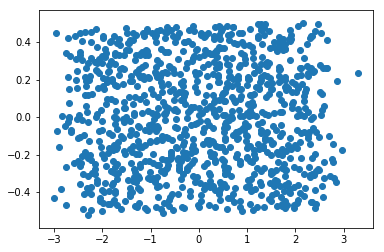

In [43]:
plt.scatter(own_scores[:,0], own_scores[:,1])
plt.show()

In [44]:
own_pca_testdata.getEigenvectors()

array([[ 0.18857784,  0.00448705],
       [ 0.98203351,  0.00623651],
       [-0.00697082,  0.99997049]])

In [53]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<script>requirejs.config({paths: { 'plotly': ['https://cdn.plot.ly/plotly-latest.min']},});if(!window.Plotly) {{require(['plotly'],function(plotly) {window.Plotly=plotly;});}}</script>

In [60]:
%matplotlib inline

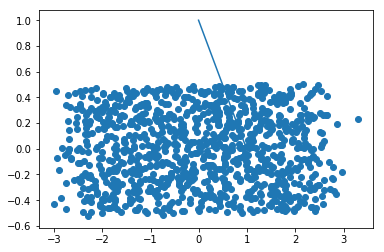

In [77]:
plt.scatter(own_scores[:,0],own_scores[:,1])
plt.plot(own_pca_testdata.getEigenvectors()[:,1])
plt.show()

In [76]:
own_pca_testdata.getEigenvectors()[:,1]

array([ 0.18857784,  0.98203351, -0.00697082])

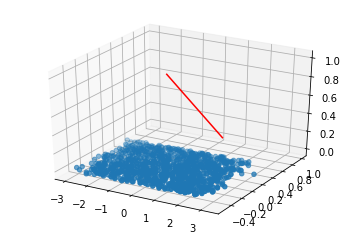

In [94]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(own_scores[:,0],own_scores[:,1], 0)
ax.plot(own_pca_testdata.getEigenvectors()[0], 
        own_pca_testdata.getEigenvectors()[1], 
        own_pca_testdata.getEigenvectors()[2], "r")

In [91]:
own_pca_testdata.getEigenvectors()[0][1]

0.0044870530107291567

In [1]:
import seaborn as sns

In [4]:
objects = ('PC1', 'PC2', 'PC3')
x_pos = np.arange(len(objects))

In [14]:
performance = [i/sum(own_pca_testdata.getEigenvalues())*100 for i in own_pca_testdata.getEigenvalues()]

In [15]:
performance

[96.291790982744203, 3.5608224832412216, 0.14738653401457716]

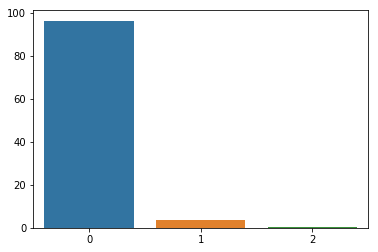

In [20]:
#Here we can see PC1 covers 96.29% data
sns.barplot(x_pos, performance)